In [1]:
import numpy as np
import sys
import pandas

In [2]:
from clustering import SVD
import matplotlib.pyplot as plt

In [3]:
features = ['age', 'sex', 'chest_pain', 'bp', 'cholesterol', 'fasting_sugar', 
           'ecg', 'max_heart_rate', 'angina', 'ST_depression', 'slope_of_peak_exercise',
           'no_major_vessels', 'thalassemia', 'disease']

In [4]:
heart_disease = pandas.read_csv('/Users/localadmin/Desktop/LAOML/heart.csv', names = features )

In [5]:
features = np.array(heart_disease)[:, :-1]
label = np.array(heart_disease)[:, -1]

In [6]:
scaled_features = ((features - np.mean(features, axis = 0)) / np.std(features, axis = 0))

In [7]:
covariance = (1 / features.shape[0]) * (scaled_features.T @ scaled_features)

In [8]:
eigval, eigvec = np.linalg.eigh(covariance)
eigval = eigval[::-1]
eigvec = eigvec[:, ::-1]

In [9]:
dim = 2

In [10]:
features.shape, eigvec[:, :dim].shape

((270, 13), (13, 2))

In [11]:
reduced_data_set = scaled_features @ eigvec[:, :dim]

In [12]:
reduced_data_set.shape

(270, 2)

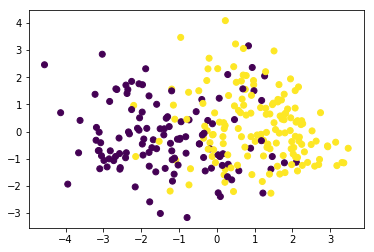

In [13]:
to_plot = reduced_data_set
plt.scatter(to_plot[:, 0], to_plot[:, 1], c = label);

In [14]:
variances  = (eigval / sum(eigval)) * 100

In [15]:
variances

array([23.42553084, 12.36667626,  9.54720004,  8.92837948,  7.78754038,
        6.98930293,  6.35298986,  5.76421898,  5.21241035,  4.4318274 ,
        3.48854807,  3.09871216,  2.60666325])

In [16]:
total_variances = list(sum(variances[:i]) for i in range(1, len(variances) + 1))

Text(0.5, 0, '# PC')

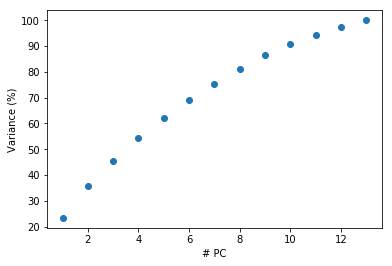

In [17]:
plt.scatter(range(1, len(variances)+1), total_variances)
plt.ylabel('Variance (%)')
plt.xlabel('# PC')

#### Exercise 2: Feed-forward neural network

In [18]:
# example of the normalized xavier weight initialization
from math import sqrt

def initialize_weights(n0 = 2, n1 = 2, activation = 'sigmoid', normalize = True, ):
    """
        Initialize weight matrices based Xavier's weight initialization method for sigmoid and tanh activation function 
        
        n0:int
        width (# neurons) of the previous layer
        n1: int
        width (# neurons) of the next layer
        dim_x: int
        no. of features for a data in the input dataset
        activation: str
        specify the type of activation function applied for nn. Could be either one sigmoid, tanh and Relu.
        normalize: bool
        decide whether to use the normalized version

    """
    random_no = np.random.rand(n0 * n1)

    if activation in ['sigmoid', 'tanh']:
        if normalize:
            lower, upper = -(sqrt(6.0) / sqrt(n0 + n1)), (sqrt(6.0) / sqrt(n0 + n1))
        else:
            lower, upper = -(1.0 / sqrt(n0)), (1.0 / sqrt(n0))
        # scale to the desired range
        weights = lower + random_no * (upper - lower)
    elif activation in ['Relu']:
        std = sqrt(2.0 / n0)
        weights = randomno * std
    else:
        print('Running out of choice to initalize weights for nn hidden layers. Please initialize on your own')

    return weights.reshape((n0, n1))

In [19]:
# NON-LINEAR ACTIVATION FUNCTON
# RELU
relu = lambda x: max(0, x)
# SIGMOID
sigmoid = lambda x: 1 / (1 + np.exp(-x))
# TANH
tanh = lambda x: (np.exp(x) - np.exp(-x))/(np.exp(x) + np.exp(-x))

In [20]:
x = np.linspace(-3, 3)
x = x[x!=0]


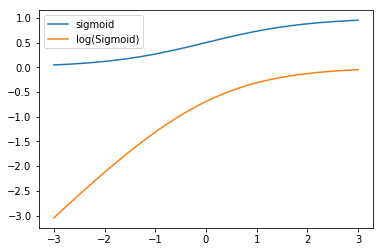

In [43]:
# plt.plot(x, list(map(relu, x)), label = 'Relu');
# plt.plot(x, np.log(np.array(list(map(relu, x)))), label = 'log(Relu)');

plt.plot(x, list(map(sigmoid, x)), label = 'sigmoid');
plt.plot(x, np.log(np.array(list(map(sigmoid, x)))), label = 'log(Sigmoid)');

# plt.plot(x, list(map(tanh, x)), label = 'tanh');
plt.legend();

In [22]:
def hidden_layer(
    width: int, 
    X: np.ndarray,
    b: float,
    activation: callable):

    """
    Implements operations for a hidden layer in the neural network

    width: no. of neurons in the hidden layer
    X: original data or the outputs from the previous hidden layer
    b: bias to the linear function
    activation: activation function - sigmoid, relu or tanh
    """
    
    weights = initialize_weights(X.shape[0], width)
    # sum (w * x + b)
    neurons = weights.T @ X + b
    activate = np.array(list(map(activation, neurons)))
    return activate

In [23]:
data = reduced_data_set.copy()
width = 5

In [24]:
%%time
def nn(data:np.ndarray, bias: float, depth:int, width:int, activation:callable):
    for i in range(depth):
        data = hidden_layer(width, data, bias, activation)
    return data


CPU times: user 5 µs, sys: 1 µs, total: 6 µs
Wall time: 9.06 µs


In [37]:
%%time
depth, width = 20, 20
nn_result = nn(data[0], 0.0, 2, 2, sigmoid)

CPU times: user 168 µs, sys: 20 µs, total: 188 µs
Wall time: 310 µs


In [38]:
sum(nn_result)

1.0072381901015526

#### Exercise 3: 

In [ ]:
## 